**Fomula One Data Analysis Final Project**
**Introduction** Formula One, also known as F1, is a motorsport where racing teams participate in races around the world. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# import data
df_drivers = pd.read_csv('raw_data/drivers.csv')
df_constructor_results = pd.read_csv('raw_data/constructor_results.csv')
df_constructor_standings = pd.read_csv('raw_data/constructor_standings.csv')
df_driver_standings = pd.read_csv('raw_data/driver_standings.csv')
df_qualifying = pd.read_csv('raw_data/qualifying.csv')
df_races = pd.read_csv('raw_data/races.csv')
df_results = pd.read_csv('raw_data/results.csv')

In [3]:
# merge data together
df_merged = pd.merge(df_drivers, df_constructor_standings, left_on='driverId', right_on='constructorId')
df_merged = pd.merge(df_merged, df_races, on='raceId')
print(df_merged.head())

   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                           url_x  \
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton   
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld   
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg   
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso   
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen   

   constructorStandingsId  ...  fp1_date  fp1_time  fp2_date  fp2_time  \
0                       1  ...        \N        \N        \N        \N   
1                     

In [6]:
# change the dob to datetime format
df_merged['dob'] = pd.to_datetime(df_merged['dob'], errors = 'coerce')
times = ['fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'sprint_time']

df_merged['age'] = datetime.now() - df_merged['dob']
df_merged['age'] = df_merged['age'].astype('<m8[Y]')

for column in ['date', 'fp1_date', 'fp2_date', 'fp3_date', 'quali_date', 'sprint_date']:
    df_merged[column] = pd.to_datetime(df_merged[column], errors='coerce')

df_merged[times] = df_merged[times].fillna(r'\N')

print(df_merged)

       driverId   driverRef number code  forename     surname        dob  \
0             1    hamilton     44  HAM     Lewis    Hamilton 1985-01-07   
1             2    heidfeld     \N  HEI      Nick    Heidfeld 1977-05-10   
2             3     rosberg      6  ROS      Nico     Rosberg 1985-06-27   
3             4      alonso     14  ALO  Fernando      Alonso 1981-07-29   
4             5  kovalainen     \N  KOV    Heikki  Kovalainen 1981-10-19   
...         ...         ...    ...  ...       ...         ...        ...   
12936       176       surer     \N   \N      Marc       Surer 1951-09-18   
12937       183    hesnault     \N   \N  François    Hesnault 1956-12-30   
12938       184       baldi     \N   \N     Mauro       Baldi 1954-01-31   
12939       189     gartner     \N   \N        Jo     Gartner 1954-01-24   
12940       191   thackwell     \N   \N      Mike   Thackwell 1961-03-30   

         nationality                                              url_x  \
0           

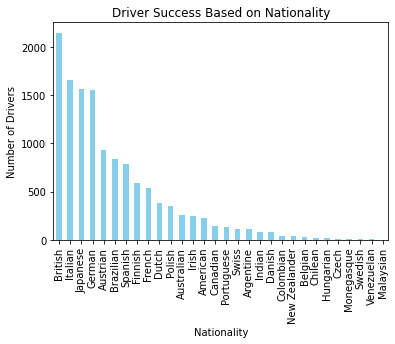

In [7]:
nationality_counts = df_merged['nationality'].value_counts()

nationality_counts.plot(kind='bar', color='skyblue')
plt.title('Driver Success Based on Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Drivers')
plt.show()

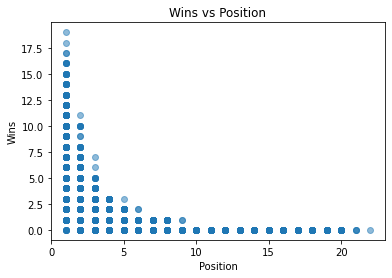

In [8]:
df_merged['positionText'] = pd.to_numeric(df_merged['positionText'], errors='coerce')

plt.scatter(df_merged['positionText'], df_merged['wins'], alpha=0.5)
plt.title('Wins vs Position')
plt.xlabel('Position')
plt.ylabel('Wins')

plt.show()

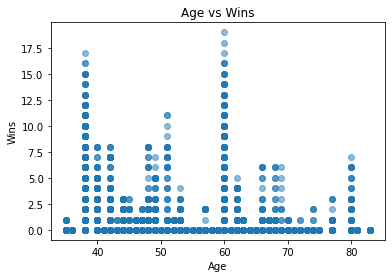

In [9]:
plt.scatter(df_merged['age'], df_merged['wins'], alpha=0.5)
plt.title('Age vs Wins')
plt.xlabel('Age')
plt.ylabel('Wins')
plt.show()